In [1]:
from dotenv import load_dotenv
import os
import pandas as pd

load_dotenv()
data_path = os.getenv('DATA_PATH')
import sys
sys.path.append(f'{data_path}/../code/data_prep')

from CanDataLoader import CanDataLoader
dataset = CanDataLoader(data_path, log_verbosity=1)

Found ambient and attack directories.
Loading CAN metadata...
Parquet files found...
Found processed parquet files...
Loading processed parquet files...
Loading processing data into 'CanData' structure


C:\Users\elija\AppData\Local\Temp\ipykernel_28436\4226826626.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


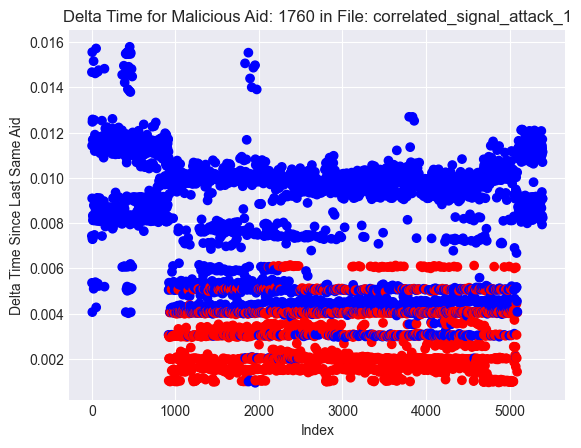

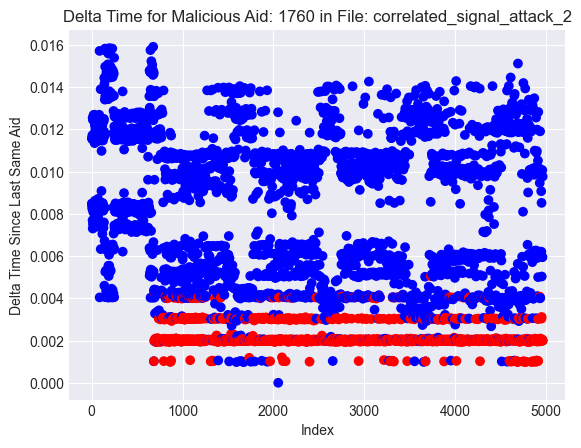

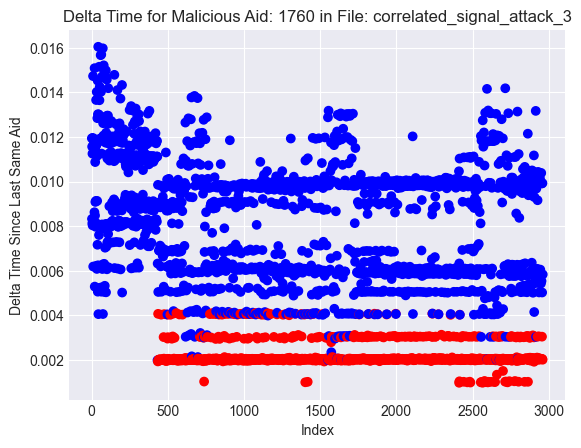

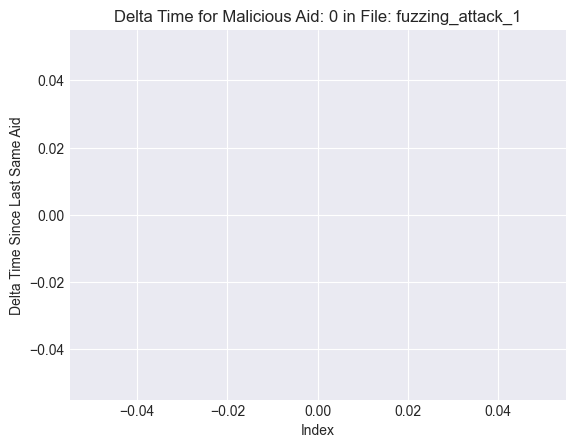

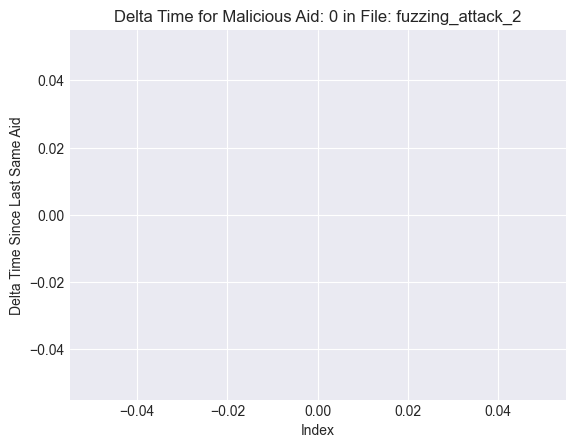

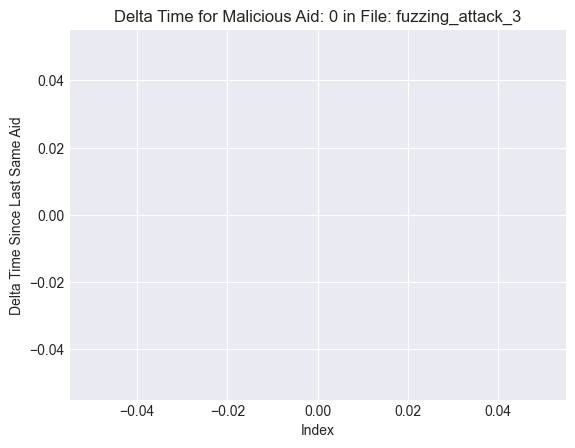

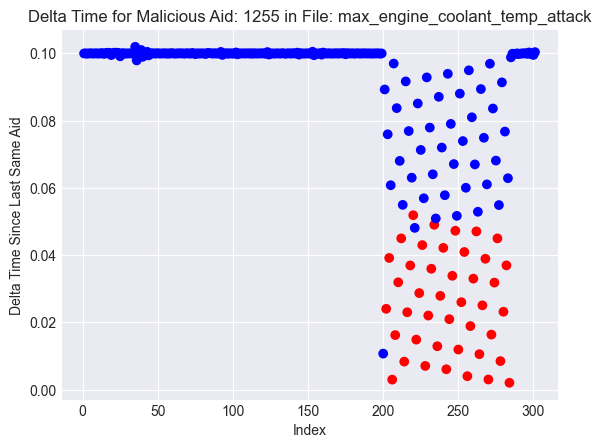

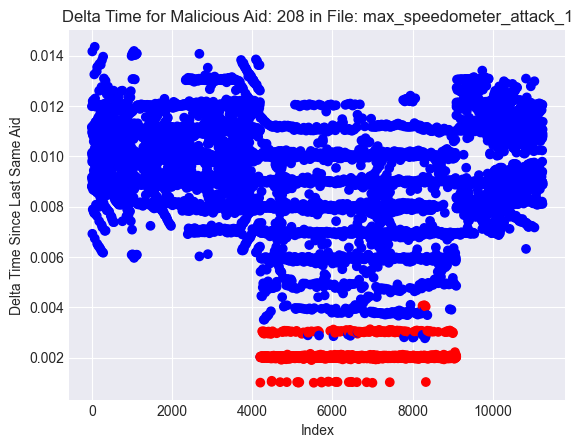

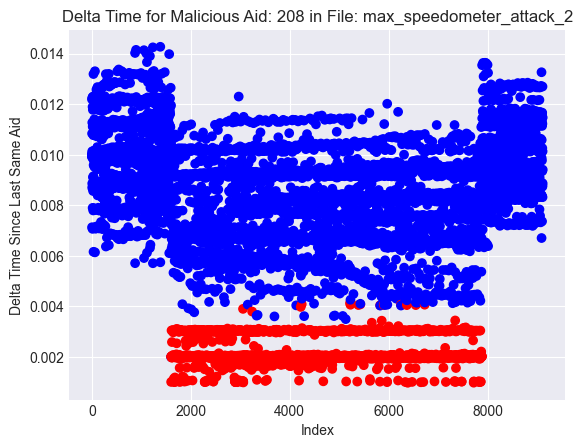

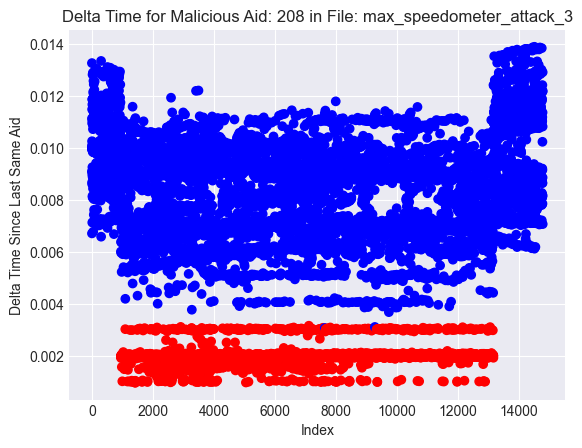

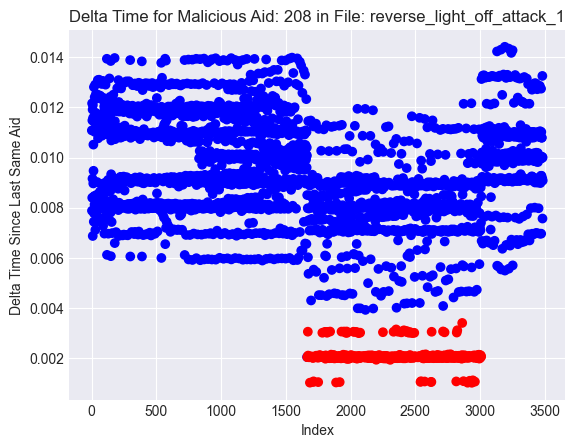

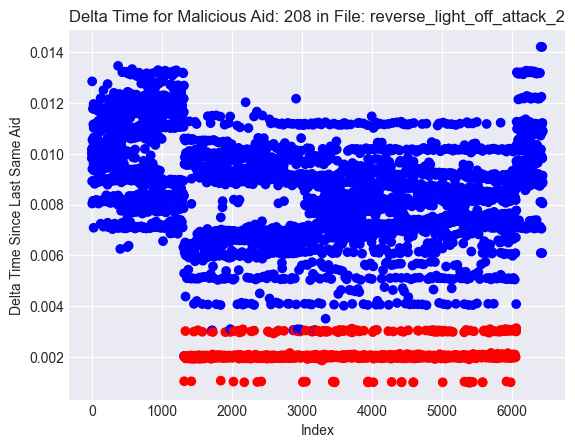

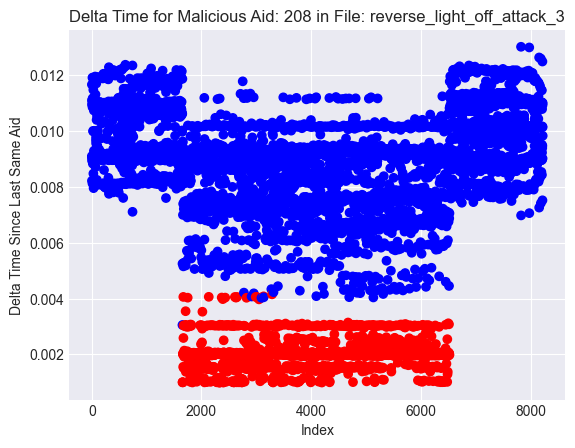

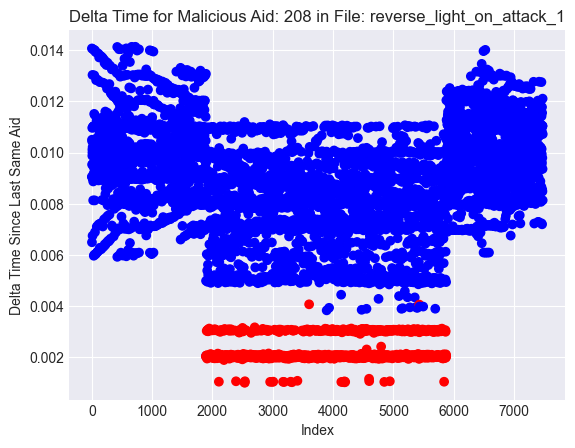

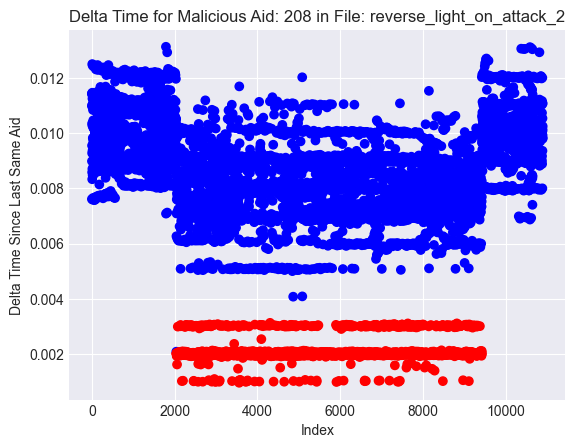

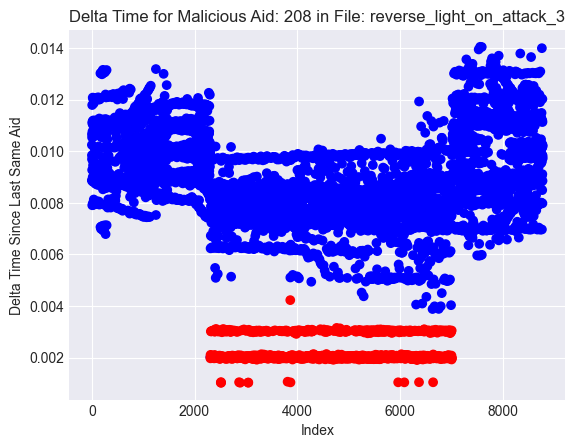

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

def process_and_plot(df, file_name):
    # Initialize an empty set to hold the unique aid values
    malicious_aids = set()

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Check if the actual_attack column has a true value
        if row['actual_attack']:
            # If so, add the aid value to the set
            malicious_aids.add(row['aid'])

    # Convert the set to a list
    malicious_aids_list = list(malicious_aids)

    # If there are no malicious aids, exit the function
    if not malicious_aids_list:
        return

    # Get the first element from the list
    first_malicious_aid = malicious_aids_list[0]

    # Initialize empty arrays to hold the delta_time_last_same_aid values and actual_attack values
    delta_time_array = []
    actual_attack_array = []

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Check if the aid matches the first malicious aid
        if row['aid'] == first_malicious_aid:
            # If so, append the delta_time_last_same_aid value to delta_time_array
            # and the actual_attack value to actual_attack_array
            delta_time_array.append(row['delta_time_last_same_aid'])
            actual_attack_array.append(row['actual_attack'])

    # Convert actual_attack_array to a list of colors
    colors = ['red' if malicious else 'blue' for malicious in actual_attack_array]

    # Plot the array using a scatter plot
    plt.scatter(range(len(delta_time_array)), delta_time_array, c=colors)
    plt.xlabel('Index')
    plt.ylabel('Delta Time Since Last Same Aid')
    plt.title(f'Delta Time for Malicious Aid: {first_malicious_aid} in File: {file_name}')
    plt.show()

# Now, iterate through each DataFrame in dataset.attack_data
for i, df in enumerate(dataset.attack_data):
    file_name = dataset.attack_data._keys[i]  # Get the file name
    if "actual_attack" in df.columns:  # Check if the actual_attack column exists
        process_and_plot(df, file_name)  # Call the function with the DataFrame and file name
